In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)

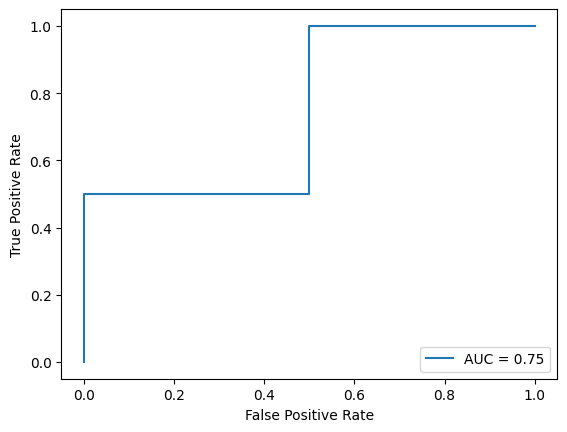

In [22]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
tpr, fpr

(array([0. , 0.5, 0.5, 1. , 1. ]), array([0. , 0. , 0.5, 0.5, 1. ]))

ValueError: Could not interpret value `tpr` for parameter `hue`

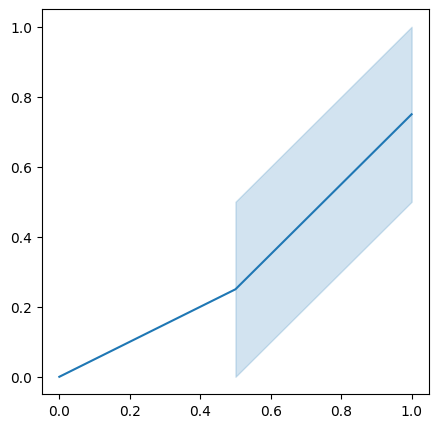

In [20]:
plt.figure(figsize = (5, 5))
sns.lineplot(x = tpr, y = fpr)
sns.lineplot(x = [0, 1], y = [0, 1], hue='tpr', color = 'green', linestyle="dashed", palette=sns.color_palette(palette='pastel'))
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.show()

In [12]:
class RocCurveDisplay(_BinaryClassifierCurveDisplayMixin):
    """ROC Curve visualization.

    It is recommend to use
    :func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
    :func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
    a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
    stored as attributes.

    Read more in the :ref:`User Guide <visualizations>`.

    Parameters
    ----------
    fpr : ndarray
        False positive rate.

    tpr : ndarray
        True positive rate.

    roc_auc : float, default=None
        Area under ROC curve. If None, the roc_auc score is not shown.

    estimator_name : str, default=None
        Name of estimator. If None, the estimator name is not shown.

    pos_label : int, float, bool or str, default=None
        The class considered as the positive class when computing the roc auc
        metrics. By default, `estimators.classes_[1]` is considered
        as the positive class.

        .. versionadded:: 0.24

    Attributes
    ----------
    line_ : matplotlib Artist
        ROC Curve.

    chance_level_ : matplotlib Artist or None
        The chance level line. It is `None` if the chance level is not plotted.

        .. versionadded:: 1.3

    ax_ : matplotlib Axes
        Axes with ROC Curve.

    figure_ : matplotlib Figure
        Figure containing the curve.

    See Also
    --------
    roc_curve : Compute Receiver operating characteristic (ROC) curve.
    RocCurveDisplay.from_estimator : Plot Receiver Operating Characteristic
        (ROC) curve given an estimator and some data.
    RocCurveDisplay.from_predictions : Plot Receiver Operating Characteristic
        (ROC) curve given the true and predicted values.
    roc_auc_score : Compute the area under the ROC curve.

    Examples
    --------
    >>> import matplotlib.pyplot as plt
    >>> import numpy as np
    >>> from sklearn import metrics
    >>> y = np.array([0, 0, 1, 1])
    >>> pred = np.array([0.1, 0.4, 0.35, 0.8])
    >>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    >>> roc_auc = metrics.auc(fpr, tpr)
    >>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
    ...                                   estimator_name='example estimator')
    >>> display.plot()
    <...>
    >>> plt.show()
    """

    def __init__(self, *, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None):
        self.estimator_name = estimator_name
        self.fpr = fpr
        self.tpr = tpr
        self.roc_auc = roc_auc
        self.pos_label = pos_label

    def plot(
        self,
        ax=None,
        *,
        name=None,
        plot_chance_level=False,
        chance_level_kw=None,
        **kwargs,
    ):
        """Plot visualization.

        Extra keyword arguments will be passed to matplotlib's ``plot``.

        Parameters
        ----------
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.

        name : str, default=None
            Name of ROC Curve for labeling. If `None`, use `estimator_name` if
            not `None`, otherwise no labeling is shown.

        plot_chance_level : bool, default=False
            Whether to plot the chance level.

            .. versionadded:: 1.3

        chance_level_kw : dict, default=None
            Keyword arguments to be passed to matplotlib's `plot` for rendering
            the chance level line.

            .. versionadded:: 1.3

        **kwargs : dict
            Keyword arguments to be passed to matplotlib's `plot`.

        Returns
        -------
        display : :class:`~sklearn.metrics.RocCurveDisplay`
            Object that stores computed values.
        """
        self.ax_, self.figure_, name = self._validate_plot_params(ax=ax, name=name)

        line_kwargs = {}
        if self.roc_auc is not None and name is not None:
            line_kwargs["label"] = f"{name} (AUC = {self.roc_auc:0.2f})"
        elif self.roc_auc is not None:
            line_kwargs["label"] = f"AUC = {self.roc_auc:0.2f}"
        elif name is not None:
            line_kwargs["label"] = name

        line_kwargs.update(**kwargs)

        chance_level_line_kw = {
            "label": "Chance level (AUC = 0.5)",
            "color": "k",
            "linestyle": "--",
        }

        if chance_level_kw is not None:
            chance_level_line_kw.update(**chance_level_kw)

        (self.line_,) = self.ax_.plot(self.fpr, self.tpr, **line_kwargs)
        info_pos_label = (
            f" (Positive label: {self.pos_label})" if self.pos_label is not None else ""
        )

        xlabel = "False Positive Rate" + info_pos_label
        ylabel = "True Positive Rate" + info_pos_label
        self.ax_.set(
            xlabel=xlabel,
            xlim=(-0.01, 1.01),
            ylabel=ylabel,
            ylim=(-0.01, 1.01),
            aspect="equal",
        )

        if plot_chance_level:
            (self.chance_level_,) = self.ax_.plot(
                (0, 1), (0, 1), **chance_level_line_kw
            )
        else:
            self.chance_level_ = None

        if "label" in line_kwargs or "label" in chance_level_line_kw:
            self.ax_.legend(loc="lower right")

        return self

NameError: name '_BinaryClassifierCurveDisplayMixin' is not defined

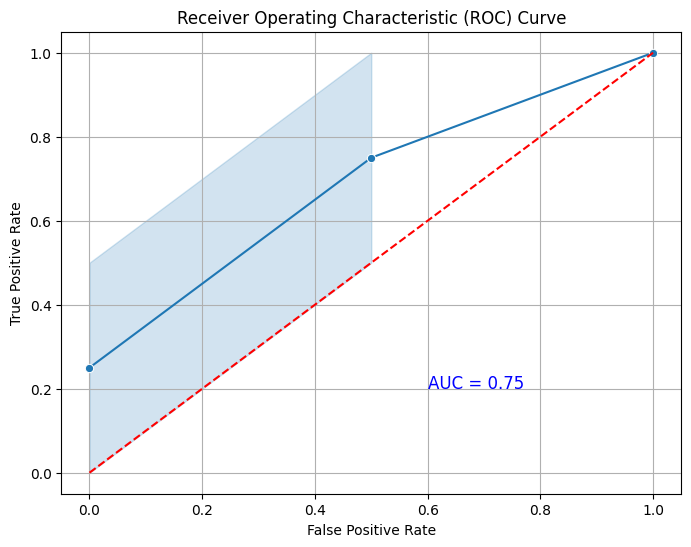

In [25]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
y_true = np.array([0, 0, 1, 1])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Create a DataFrame with the results
roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_df, x='FPR', y='TPR', marker='o')

# Plot diagonal line for no-skill classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# Add AUC score to the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='blue')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)

# Show plot
plt.show()

In [28]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [29]:
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [ ]:
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])

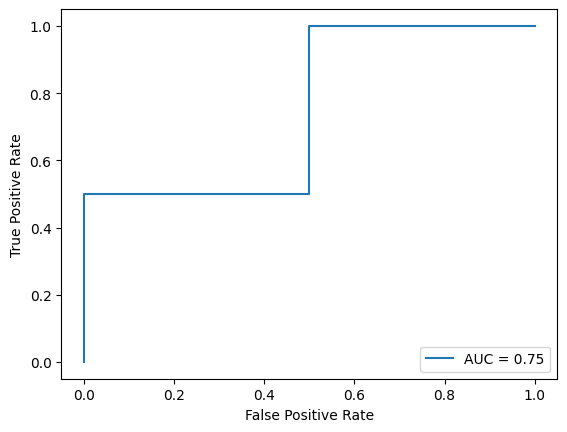

In [24]:
# Example data
y_true = np.array([0, 0, 1, 1])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [39]:
roc_df

,FPR,TPR,Threshold
0,0.0,0.0,1.80
1,0.0,0.5,0.80
2,0.5,0.5,0.40
3,0.5,1.0,0.35
4,1.0,1.0,0.10


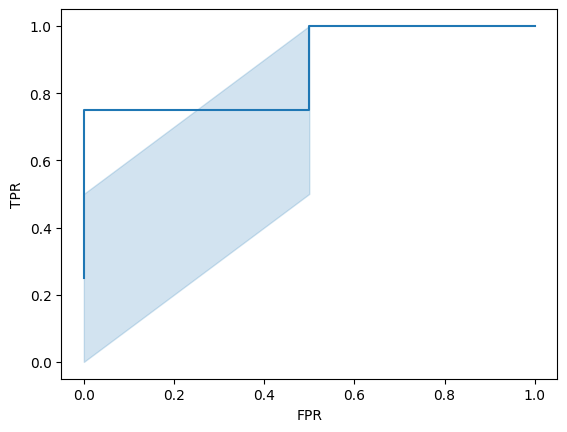

In [43]:
sns.lineplot(roc_df,x=roc_df['FPR'],y=roc_df['TPR'], drawstyle='steps')
plt.show()

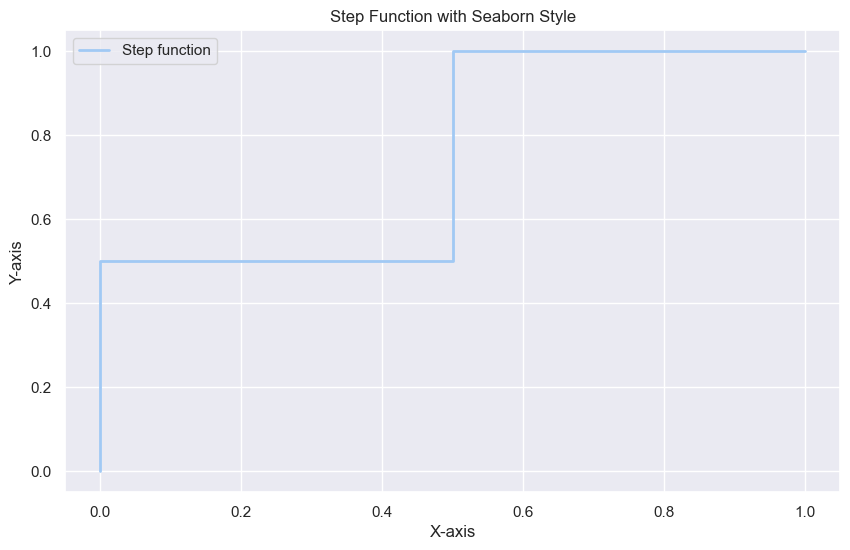

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set(style="darkgrid")

# Define data for the step function
x = np.arange(0, 10, 1)
y = np.array([1, 2, 3, 2, 5, 6, 7, 6, 5, 4])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the step function using Matplotlib
plt.step(roc_df['FPR'], roc_df['TPR'], where='mid', label='Step function', color=palette[0], linewidth=2)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Step Function with Seaborn Style')
plt.legend()

# Show the plot
plt.show()

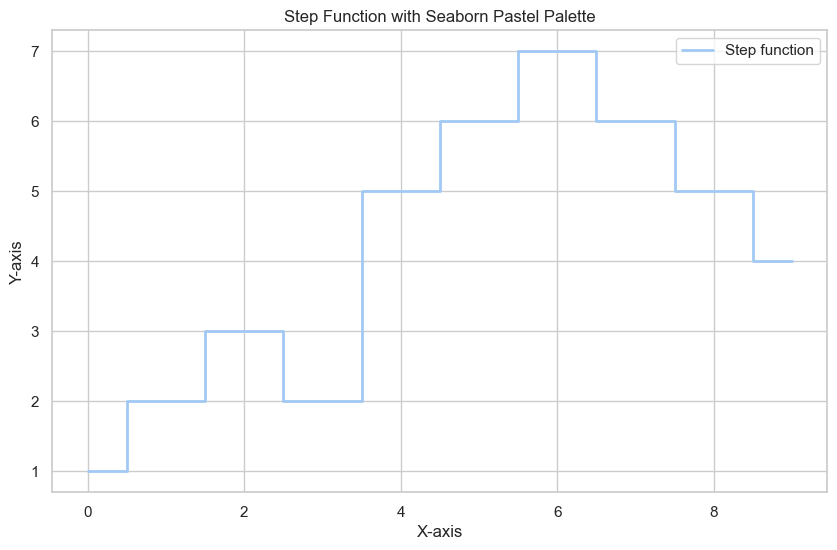

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
#sns.set(style="whitegrid")

# Define data for the step function
x = np.arange(0, 10, 1)
y = np.array([1, 2, 3, 2, 5, 6, 7, 6, 5, 4])

# Create a pastel color palette
palette = sns.color_palette(palette='pastel')

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the step function using Matplotlib
plt.step(x, y, where='mid', label='Step function', color=palette[0], linewidth=2)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Step Function with Seaborn Pastel Palette')
plt.legend()

# Show the plot
plt.show()


In [47]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

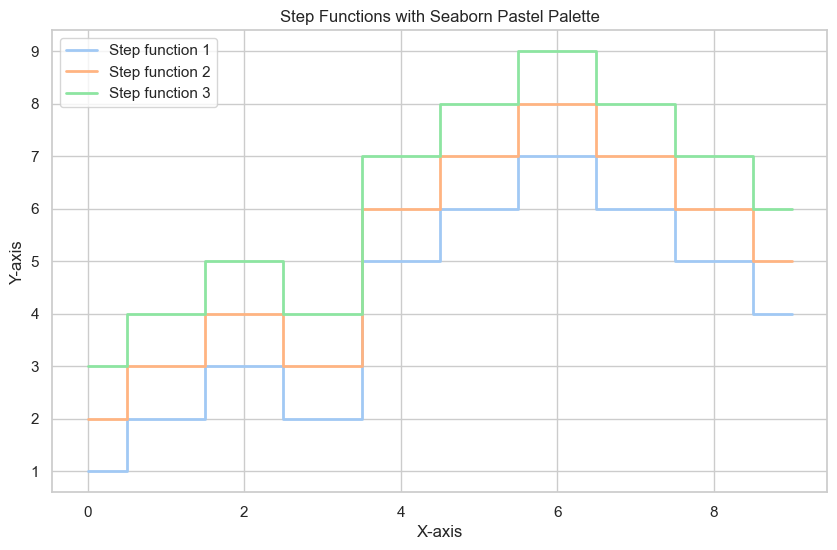

In [54]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define data for the step functions
x = np.arange(0, 10, 1)
y_list = [
    [1, 2, 3, 2, 5, 6, 7, 6, 5, 4],
    [2, 3, 4, 3, 6, 7, 8, 7, 6, 5],
    [3, 4, 5, 4, 7, 8, 9, 8, 7, 6]
]

# Create a pastel color palette
palette = sns.color_palette(palette='pastel')

# Create a new figure
plt.figure(figsize=(10, 6))

# Loop to add step functions
for i, y in enumerate(y_list):
    plt.step(x, y, where='mid', label=f'Step function {i+1}', color=palette[i], linewidth=2)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Step Functions with Seaborn Pastel Palette')
plt.legend()

# Show the plot
plt.show()

In [56]:
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [57]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [58]:
sns.step(x = fpr, y = tpr, label=f'MultinomialNB AUC = {roc_auc}')
sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', linestyle="dashed")
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.show()

AttributeError: module 'seaborn' has no attribute 'step'

In [65]:
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [66]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

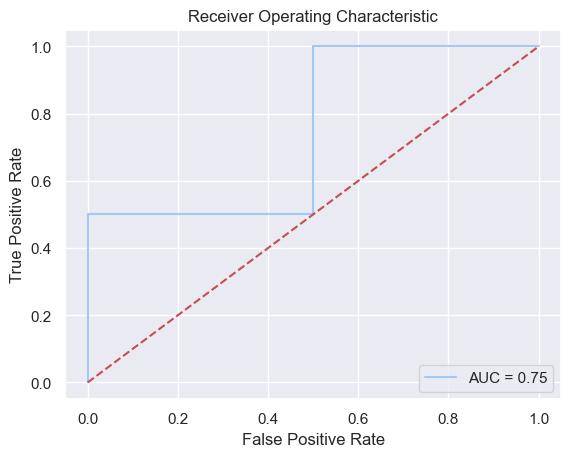

In [71]:
# Set Seaborn style
sns.set_theme(style="darkgrid")
# Create a pastel color palette
palette = sns.color_palette(palette='pastel')

plt.title('Receiver Operating Characteristic')
plt.step(fpr, tpr, color=palette[0], where='mid', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()